<a href="https://colab.research.google.com/github/AparnaR06/Data-Exploration-and-Visualization/blob/main/Ex_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/tmp/ipython-input-1-2682210856.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')



Basic Statistics:

              Sales
count     48.000000
mean   29559.562500
std    11393.671539
min    10797.000000
25%    20761.500000
50%    29056.000000
75%    38202.500000
max    49512.000000


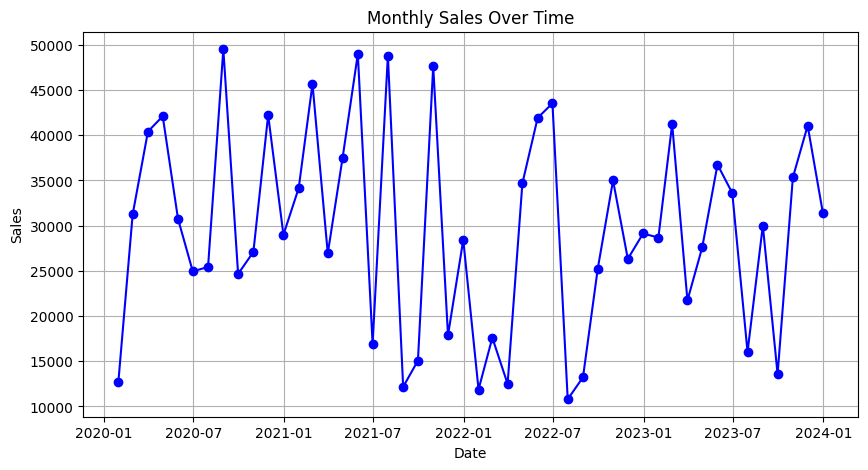

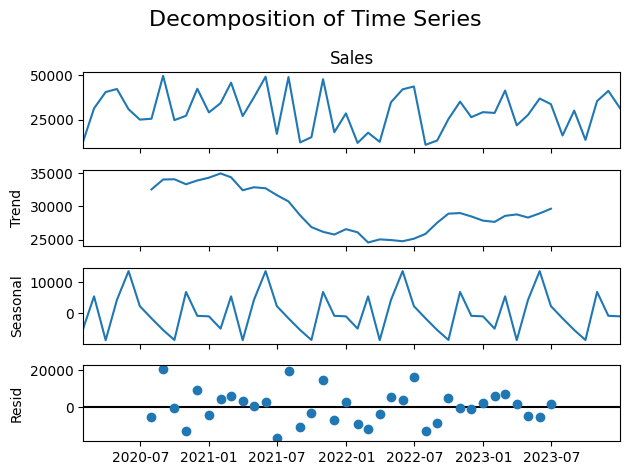

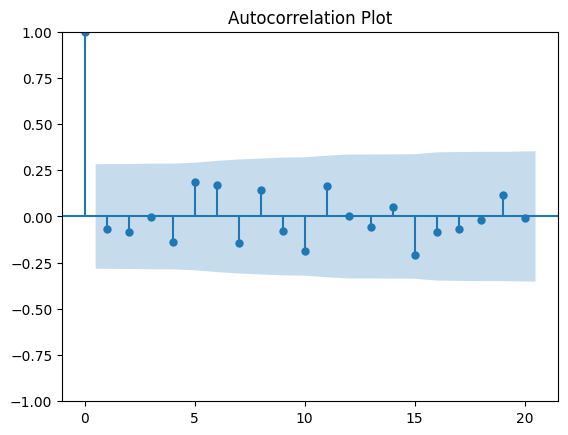

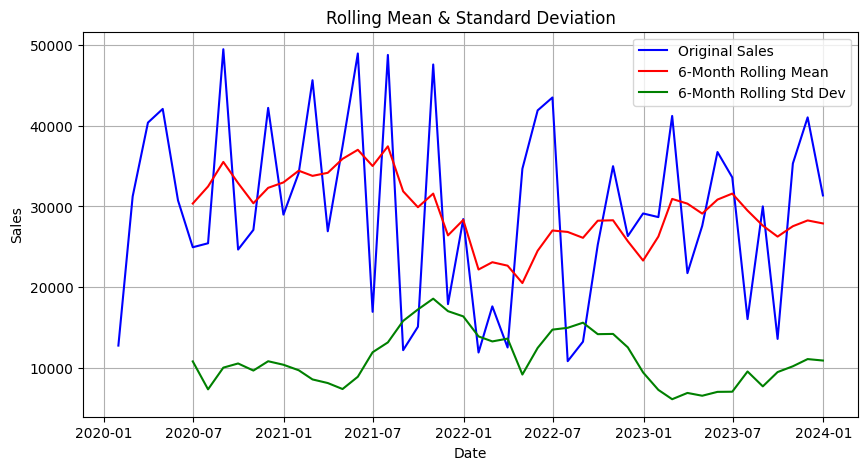


Analysis Completed. Visualizations displayed.


In [1]:
# STEP 1: Data Preparation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf

# To display plots within the notebook
%matplotlib inline

# Generate sample time series data
np.random.seed(0)
date_range = pd.date_range(start='2020-01-01', end='2023-12-31', freq='M')
sales_data = np.random.randint(10000, 50000, size=len(date_range))

# Create DataFrame
df = pd.DataFrame({'Date': date_range, 'Sales': sales_data})
df.set_index('Date', inplace=True)

# STEP 2: Data Exploration
print("\nBasic Statistics:\n")
print(df.describe())

# Line plot of time series data
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.show()

# STEP 3: Decomposition
decomposition = sm.tsa.seasonal_decompose(df['Sales'], model='additive', period=12)

# STEP 4: Visualization of Decomposed Components
decomposition.plot()
plt.suptitle('Decomposition of Time Series', fontsize=16)
plt.tight_layout()
plt.show()

# STEP 5: Autocorrelation Plot
plot_acf(df['Sales'], lags=20)
plt.title('Autocorrelation Plot')
plt.show()

# STEP 6: Rolling Statistics
rolling_mean = df['Sales'].rolling(window=6).mean()
rolling_std = df['Sales'].rolling(window=6).std()

plt.figure(figsize=(10, 5))
plt.plot(df['Sales'], label='Original Sales', color='blue')
plt.plot(rolling_mean, label='6-Month Rolling Mean', color='red')
plt.plot(rolling_std, label='6-Month Rolling Std Dev', color='green')
plt.title('Rolling Mean & Standard Deviation')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.legend()
plt.grid(True)
plt.show()

# STEP 7: Interpretation and Further Analysis
# (Interpret the graphs visually while running the program)

# STEP 8: Report and Visualization Export (Optional)
# Save any figure as image if required
plt.figure(figsize=(10, 5))
plt.plot(df.index, df['Sales'], marker='o', linestyle='-', color='b')
plt.title('Monthly Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.grid(True)
plt.savefig('monthly_sales.png')  # Saves the figure as an image file in Colab
plt.close()

print("\nAnalysis Completed. Visualizations displayed.")
